In [6]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [9]:
# code here
series = pd.Series(dtype='float64')
series

Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [11]:
# code here
a = pd.Series([1,2,3])
b = pd.Series([1,2,3])

add = a + b
subtract = a - b
multiple = a * b
divide = a / b

print("Add: \n", add)
print("Subtract: \n", subtract)
print("Multiple: \n", multiple)
print("Divide: \n", divide)

Add: 
 0    2
1    4
2    6
dtype: int64
Subtract: 
 0    0
1    0
2    0
dtype: int64
Multiple: 
 0    1
1    4
2    9
dtype: int64
Divide: 
 0    1.0
1    1.0
2    1.0
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [12]:
# code here
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])

# Comparison
print("Series 1:\n", s1)
print("\nSeries 2:\n", s2)

print("\nElement-wise Comparison:")
print("Equal:\n", s1 == s2)
print("Greater than:\n", s1 > s2)
print("Less than:\n", s1 < s2)


Series 1:
 0     2
1     4
2     6
3     8
4    10
dtype: int64

Series 2:
 0     1
1     3
2     5
3     7
4    10
dtype: int64

Element-wise Comparison:
Equal:
 0    False
1    False
2    False
3    False
4     True
dtype: bool
Greater than:
 0     True
1     True
2     True
3     True
4    False
dtype: bool
Less than:
 0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [13]:
# code here
def change_dtype(series, dtype):
    try:
        if dtype == 'numeric':
            # Converts to numeric (float or int); invalid parsing will raise an error unless errors='coerce'
            return pd.to_numeric(series, errors='coerce')
        else:
            return series.astype(dtype)
    except Exception as e:
        print("Error:", e)
        return None

# Example usage
series = pd.Series([1, 2, 'Python', 2.0, True, 100])
converted_series = change_dtype(series, 'numeric')

print("Original Series:")
print(series)

print("\nConverted Series (to float using 'numeric'):")
print(converted_series)

Original Series:
0         1
1         2
2    Python
3       2.0
4      True
5       100
dtype: object

Converted Series (to float using 'numeric'):
0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [27]:
# code here
batsman_runs = pd.read_csv('batsman_runs_series.csv')

# Group by batsman and sum their total runs
top_scorers = batsman_runs.groupby('batter')['batsman_run'].sum()

# Sort the result in descending order and get the top 10
top_10_scorers = top_scorers.sort_values(ascending=False).head(10)

# Display the result
print("🏆 Top 10 Run Getters (2008-2022):")
print(top_10_scorers)

🏆 Top 10 Run Getters (2008-2022):
batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64


###`Q-7` No of players having runs above 3000

In [29]:
# code here
batsman_runs[batsman_runs['batsman_run'] > 3000]

,batter,batsman_run
27,AB de Villiers,5181
46,AM Rahane,4074
60,AT Rayudu,4190
108,CH Gayle,4997
130,DA Warner,5883
169,F du Plessis,3403
174,G Gambhir,4217
251,KA Pollard,3437
256,KD Karthik,4377
263,KL Rahul,3895


###`Q-8` No of players having runs above mean value?

In [33]:
# code here
batsman_runs[batsman_runs['batsman_run'] > batsman_runs['batsman_run'].mean()]

,batter,batsman_run
15,A Symonds,974
27,AB de Villiers,5181
29,AC Gilchrist,2069
34,AD Mathews,724
36,AD Russell,2039
...,...,...
587,WP Saha,2427
594,Y Venugopal Rao,985
596,YBK Jaiswal,547
597,YK Pathan,3222


Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9` 
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [48]:
# code here
items = pd.read_csv('items.csv', index_col='item_name')

print("I: ", items.isna().sum)

items['item_price'] = items['item_price'].str.replace('$', '', regex=False).astype(float)

# Multiply by 280 to convert to rupees
items['item_price_rupees'] = items['item_price'] * 280

# iv. Fill NaN (if any) in the new series with its mean
items['item_price_rupees'] = items['item_price_rupees'].fillna(items['item_price_rupees'].mean())

print("\n✅ Final Items:")
print(items.head())

I:  <bound method DataFrame.sum of                                        item_price
item_name                                        
Chips and Fresh Tomato Salsa                False
Izze                                        False
Nantucket Nectar                            False
Chips and Tomatillo-Green Chili Salsa       False
Chicken Bowl                                False
...                                           ...
Steak Burrito                               False
Steak Burrito                               False
Chicken Salad Bowl                          False
Chicken Salad Bowl                          False
Chicken Salad Bowl                          False

[4622 rows x 1 columns]>

✅ Final Items:
                                       item_price  item_price_rupees
item_name                                                           
Chips and Fresh Tomato Salsa                 2.39              669.2
Izze                                         3.39              949

###`Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [52]:
# code here
mean = items['item_price_rupees'].mean()
p30 = items['item_price_rupees'].quantile(0.30)
p6 = items['item_price_rupees'].quantile(0.06)

print("Mean: ", mean)
print("30th Percentile: ", p30)
print("6th Percentile: ", p6)

Mean:  2089.6488188976377
30th Percentile:  1246.0
6th Percentile:  350.0


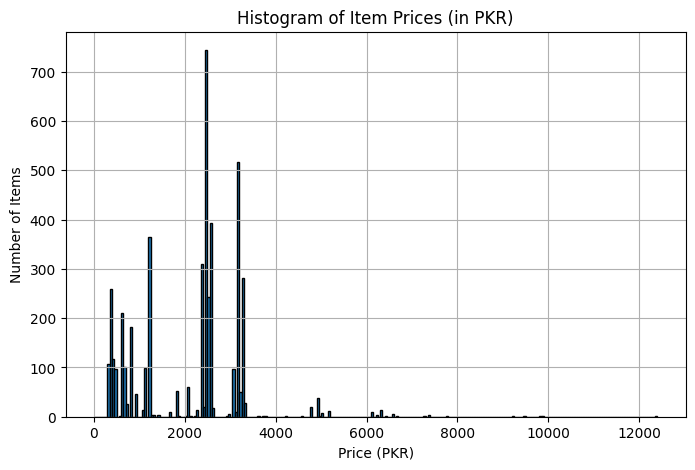

In [55]:
import matplotlib.pyplot as plt

# iii. Plot Histogram with bin size 50
plt.figure(figsize=(8, 5))
plt.hist(items['item_price_rupees'], bins=range(0, int(items['item_price_rupees'].max()) + 50, 50), edgecolor='black')
plt.title("Histogram of Item Prices (in PKR)")
plt.xlabel("Price (PKR)")
plt.ylabel("Number of Items")
plt.grid(True)
plt.show()

In [56]:
items[(items['item_price_rupees'] > 1000) & (items['item_price_rupees'] < 2000)] 

,item_price,item_price_rupees
item_name,,
Chips and Guacamole,4.45,1246.0
Chips and Guacamole,4.45,1246.0
Chips and Guacamole,4.45,1246.0
Chips and Guacamole,4.45,1246.0
Chips and Guacamole,4.45,1246.0
...,...,...
Chips and Guacamole,4.45,1246.0
Chips and Guacamole,4.45,1246.0
Chips and Guacamole,4.45,1246.0
